### Get session info
- Data is appended per cell


In [13]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/GEVI-screening/190429/dish_3/cell_1'
# dataPath = '/Users/zhengj10/Desktop/Temp/'


### Import modules

In [14]:
import os
from glob import glob
from pywavesurfer import ws
from WC_ephys import get_data, mem_test, get_rmp, get_threshold, get_AP_params
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from termcolor import colored
import unicodedata
import pandas as pd


In [15]:
print os.path.exists(dataPath)


True


### Load h5 data

In [16]:
h5files = glob(os.path.join(dataPath,'*.h5'))
h5files = sorted(h5files)
h5files


['/Volumes/genie/Jihong_GENIE_stuff/GEVI-screening/190429/dish_3/cell_1/trial_0001.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/GEVI-screening/190429/dish_3/cell_1/trial_0002-0011.h5']

/Volumes/genie/Jihong_GENIE_stuff/GEVI-screening/190429/dish_3/cell_1/trial_0002-0011.h5
Mem-test


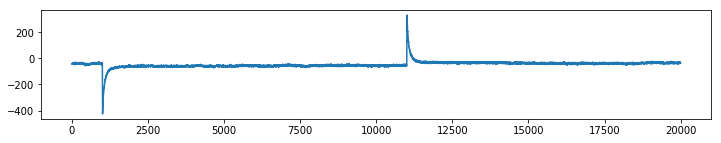

In [21]:
fig = plt.figure(figsize=(12,len(h5files)))
traces = []
a = 1
data_as_dict = ws.loadDataFile(h5files[a])
print h5files[a]
sortedKeys = sorted(data_as_dict.keys())
sweeps = sortedKeys[1:]
for sweep in sweeps:
    trace = data_as_dict[sweep]['analogScans'][0]
    traces.append(trace)
trialTypeIndex = data_as_dict['header']['StimulusLibrary']['SelectedOutputableIndex'][0]
mapElement = 'element%d' %(trialTypeIndex)
trialType = data_as_dict['header']['StimulusLibrary']['Maps'][mapElement]['Name'][0]
print trialType
# x = np.linspace(0,22.5,225000)
plt.plot(traces[0])
# plt.plot(traces[0][4900:6100])
plt.show()
imgPath = '/Users/zhengj10/Desktop/GEVI_example'
# fig.savefig(imgPath + '/figure/VC_command.png', dpi = 1200)


In [19]:
traces[0].shape

(250000,)

In [20]:
from scipy.io import loadmat
import h5py
f = h5py.File('/Users/zhengj10/Desktop/trial_0001.mat', 'r')
f.keys()
d = f['params']['img_F0']
d.value

IOError: Unable to open file (unable to open file: name = '/Users/zhengj10/Desktop/trial_0001.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# loadmat('/Users/zhengj10/Desktop/trial_0001.mat')
